In [ ]:
#!pip install prophet


## 1. Import libraries

In [129]:
#import needed libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import add_changepoints_to_plot



## 2. Uploading and preparing the data 

In [130]:
#Load the data train and test
#note we are using standardized data from pre_processing_data.
train_data = pd.read_csv('pre_processing_data/train_data.csv')
test_data = pd.read_csv('pre_processing_data/test_data.csv')


In [131]:
#Converting 'Txn_date' of train_data to datetime 
train_data['Txn_date'] = pd.to_datetime(train_data['Txn_date'])


In [132]:
# Prepare the training data
train_data['Txn_date'] = pd.to_datetime(train_data['Txn_date'])
train_data = train_data.set_index('Txn_date')
total_sales_train_data = train_data.resample('D')['Total_Amt'].sum().reset_index()
total_sales_train_data.columns = ['ds', 'y']

In [133]:
# Prepare the test data
test_data['Txn_date'] = pd.to_datetime(test_data['Txn_date'])
test_data = test_data.set_index('Txn_date')
total_sales_test_data = test_data.resample('D')['Total_Amt'].sum().reset_index()
total_sales_test_data.columns = ['ds', 'y']

In [134]:
test_data.head()

,Invoice_id,Cust_id,Product_Sub_category,Qty,Rate,Tax,Total_Amt,Store_type,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Footwear,Product_Category_Home and kitchen
Txn_date,,,,,,,,,,,,,
2018-02-20,-1.437464,-1.743252,Mens,-1.404599,0.213316,-0.840241,-0.840241,e-Shop,0,1,0,0,0
2018-09-02,-1.141048,-1.743252,Non-fiction,-0.698246,0.131009,-0.376994,-0.376994,e-Shop,1,0,0,0,0
2018-01-08,1.374135,-1.742430,Women,0.008108,-1.391676,-0.985404,-0.985404,TeleShop,0,0,0,0,0
2018-02-13,0.779040,-1.742430,Women,1.420815,-0.892991,-0.151442,-0.151442,Brick and Mortar,0,0,0,1,0
2018-12-02,1.343703,-1.741197,Women,-1.404599,0.985553,-0.655752,-0.655752,e-Shop,0,0,0,1,0


In [135]:
train_data.head()


,Invoice_id,Cust_id,Product_Sub_category,Qty,Rate,Tax,Total_Amt,Store_type,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Footwear,Product_Category_Home and kitchen
Txn_date,,,,,,,,,,,,,
2016-09-23,-0.834206,-1.743252,Women,0.714462,1.307519,1.713115,1.713115,e-Shop,0,0,0,1,0
2017-10-21,1.670769,-1.743252,Mens,0.008108,-1.665227,-1.181460,-1.181460,TeleShop,0,1,0,0,0
2017-04-12,-0.474639,-1.742841,Mobiles,-0.698246,-1.406201,-1.111481,-1.111481,Brick and Mortar,0,0,1,0,0
2017-08-23,0.143936,-1.742841,Non-fiction,0.008108,1.234895,0.897082,0.897082,TeleShop,1,0,0,0,0
2017-09-09,-0.798411,-1.742841,Fiction,1.420815,-1.464300,-0.833879,-0.833879,e-Shop,1,0,0,0,0


In [136]:
print(total_sales_train_data.head())
print(total_sales_test_data.head())


          ds         y
0 2016-01-02  0.583113
1 2016-01-03  1.006711
2 2016-01-04  5.441140
3 2016-01-05  2.083814
4 2016-01-06 -0.934934
          ds         y
0 2018-01-01 -3.740363
1 2018-01-02 -1.758408
2 2018-01-03 -7.947848
3 2018-01-04  0.437700
4 2018-01-05 -4.238147


In [138]:
#simple model

model_simple = Prophet()
model_simple.fit(total_sales_train_data)

22:14:07 - cmdstanpy - INFO - Chain [1] start processing


22:14:07 - cmdstanpy - INFO - Chain [1] done processing


In [139]:
#Forecasting
future = model_simple.make_future_dataframe(periods=365, freq='D')
forecast = model_simple.predict(future)



/Users/pilatuspc12/anaconda3/envs/ds_bootcamp/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/pilatuspc12/anaconda3/envs/ds_bootcamp/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


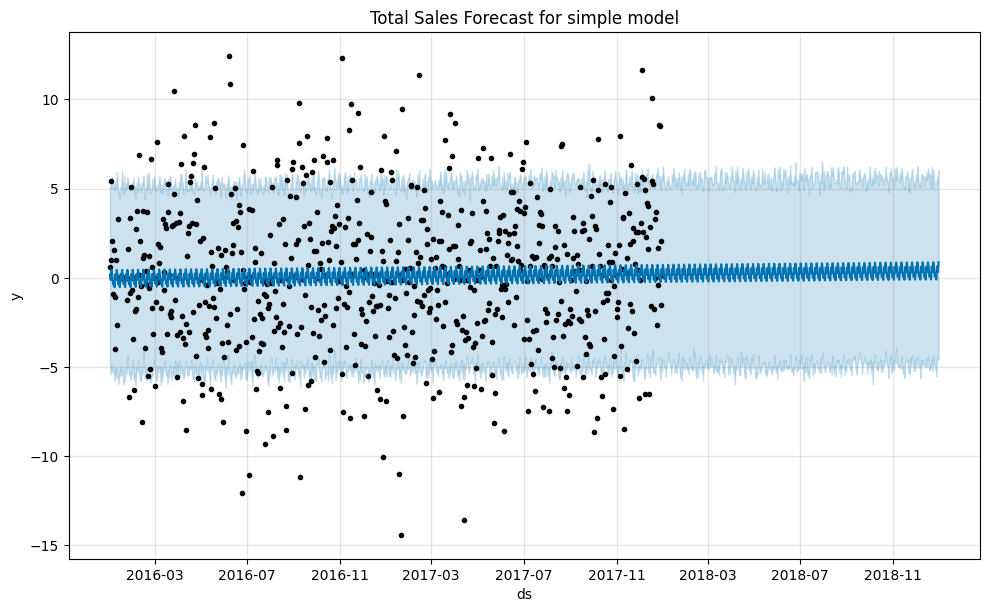

In [140]:
# Plot the forecast
fig1 = model_simple.plot(forecast)
plt.title('Total Sales Forecast for simple model')
plt.show()

In [141]:
# Prophet model with hyperparameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_range=0.9,
    changepoint_prior_scale=0.3,
    n_changepoints=50,
    seasonality_prior_scale=10.0,
    holidays_prior_scale=0.1,
    seasonality_mode='additive',
    interval_width=0.85
)
model.add_country_holidays(country_name='US')
model.fit(total_sales_train_data)

22:14:12 - cmdstanpy - INFO - Chain [1] start processing
22:14:13 - cmdstanpy - INFO - Chain [1] done processing


In [142]:
# Future dataframe for forecasting
future = model.make_future_dataframe(periods=365, freq='D')
# Forecast
forecast = model.predict(future)

/Users/pilatuspc12/anaconda3/envs/ds_bootcamp/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/pilatuspc12/anaconda3/envs/ds_bootcamp/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


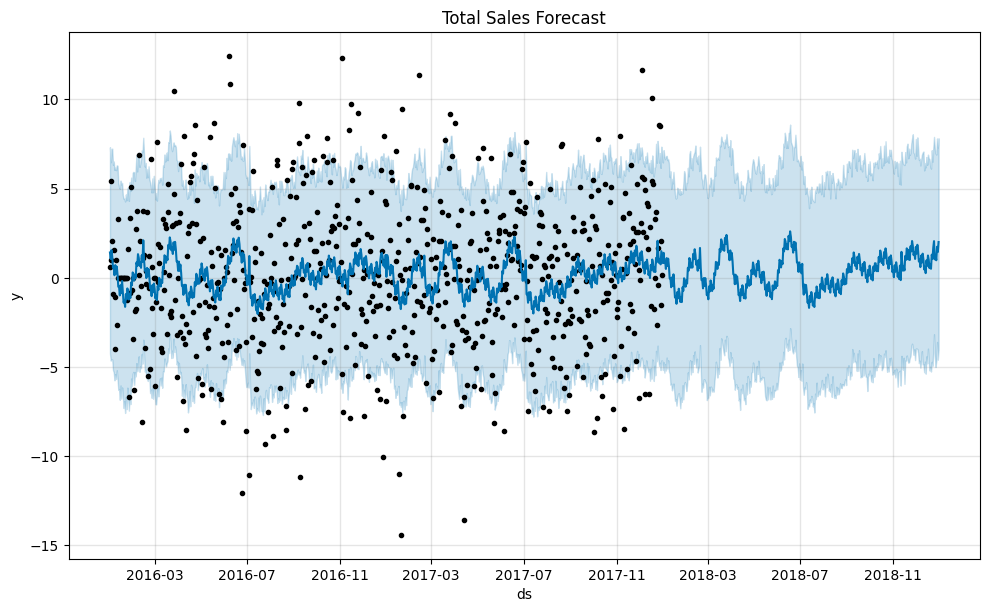

In [164]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Total Sales Forecast')
plt.show()

/Users/pilatuspc12/anaconda3/envs/ds_bootcamp/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/pilatuspc12/anaconda3/envs/ds_bootcamp/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/pilatuspc12/anaconda3/envs/ds_bootcamp/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Serie

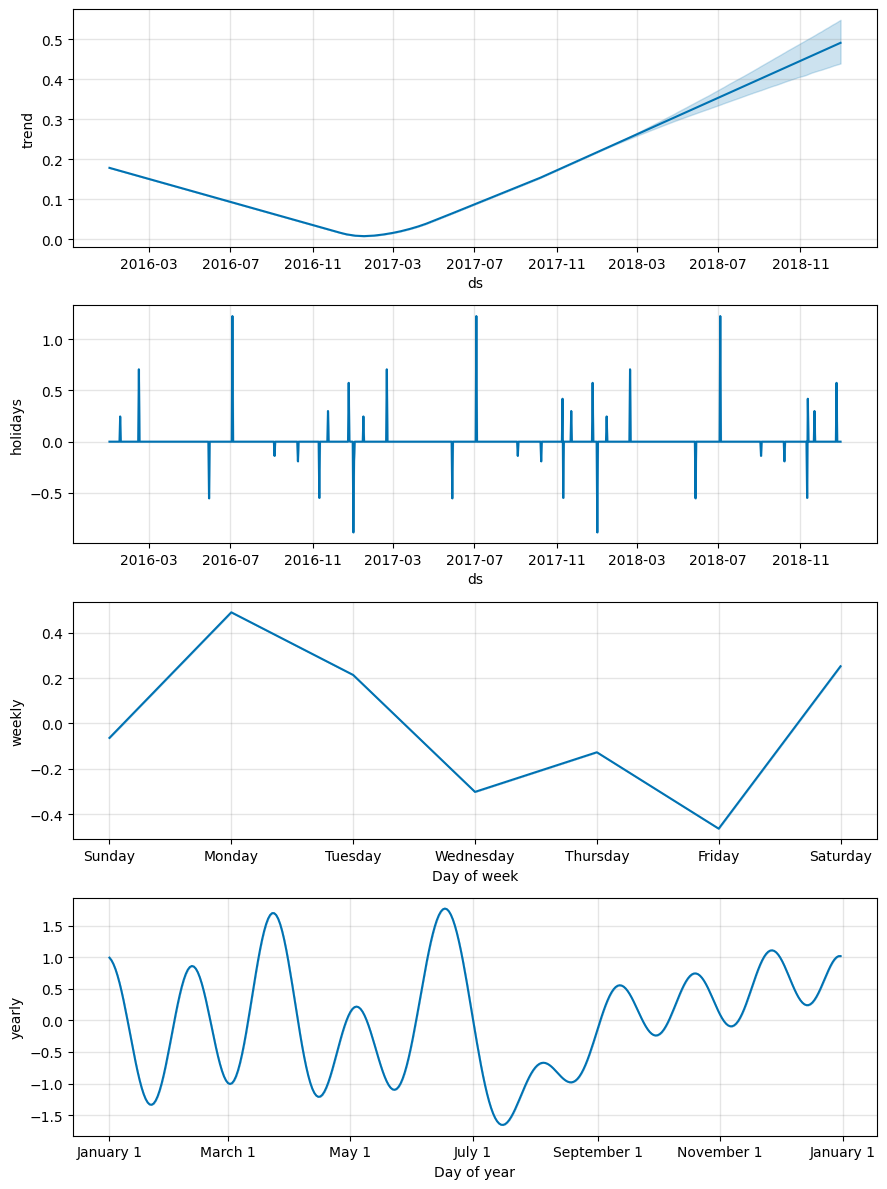

In [165]:
fig2 = model.plot_components(forecast)
plt.show()

In [166]:
# Cross-validation for simple model (no hyper param)
df_cv = cross_validation(model_simple, initial='364 days', period='180 days', horizon='365 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print(df_p)

  0%|          | 0/1 [00:00<?, ?it/s]22:36:23 - cmdstanpy - INFO - Chain [1] start processing
22:36:23 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  7.48it/s]


     horizon        mse      rmse       mae      mape     mdape     smape  \
0    36 days  26.062809  5.105175  3.923877  1.570157  1.090006  1.711713   
1    37 days  24.498873  4.949634  3.724543  1.559954  1.069395  1.687474   
2    38 days  24.773269  4.977275  3.810346  1.592550  1.094111  1.735039   
3    39 days  25.166491  5.016621  3.864211  1.577842  1.069395  1.735039   
4    40 days  25.143656  5.014345  3.850312  1.558399  1.045450  1.693222   
..       ...        ...       ...       ...       ...       ...       ...   
325 361 days  19.295503  4.392665  3.479707  2.783547  0.746974  1.284640   
326 362 days  20.560737  4.534395  3.638086  2.790308  0.785360  1.300340   
327 363 days  20.777588  4.558244  3.689330  2.834479  0.825806  1.340703   
328 364 days  20.209711  4.495521  3.566435  2.794946  0.785360  1.286487   
329 365 days  20.225226  4.497246  3.572687  2.983532  0.785360  1.307766   

     coverage  
0    0.750000  
1    0.777778  
2    0.777778  
3    0.7777

In [167]:
# Cross-validation for more complex model
df_cv = cross_validation(model, initial='364 days', period='180 days', horizon='365 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print(df_p)

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/1 [00:00<?, ?it/s]22:36:23 - cmdstanpy - INFO - Chain [1] start processing
22:36:23 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


     horizon        mse      rmse       mae      mape     mdape     smape  \
0    36 days  34.430680  5.867766  4.668526  3.396298  1.595727  1.491521   
1    37 days  32.144579  5.669619  4.474078  3.500781  1.600439  1.491521   
2    38 days  32.784498  5.725775  4.562437  3.222887  1.600439  1.491521   
3    39 days  33.364258  5.776180  4.612246  3.184802  1.595727  1.491521   
4    40 days  33.096896  5.752990  4.558583  3.115952  1.587495  1.455194   
..       ...        ...       ...       ...       ...       ...       ...   
325 361 days  21.593382  4.646868  3.703108  3.764538  0.786720  1.246591   
326 362 days  22.097878  4.700838  3.787167  3.759011  0.786720  1.251779   
327 363 days  22.929121  4.788436  3.903649  3.848903  0.851633  1.295705   
328 364 days  21.746061  4.663267  3.784252  3.822089  0.851633  1.262479   
329 365 days  21.950563  4.685143  3.809254  4.459935  0.851633  1.275300   

     coverage  
0    0.666667  
1    0.694444  
2    0.694444  
3    0.6666

In [168]:

#The dummy forecast
last_observed_value = total_sales_train_data['y'].iloc[-1]
dummy_forecast = [last_observed_value] * len(total_sales_test_data)

# Historical average
historical_avg_value = total_sales_train_data['y'].mean()
historical_avg = [historical_avg_value] * len(total_sales_test_data)
#median forecast
median_forecast = [total_sales_train_data['y'].median()] * len(total_sales_test_data)


In [169]:
# Merging the forecasted data with the actual test data
forecasted_sales = forecast[['ds', 'yhat']][forecast['ds'].isin(total_sales_test_data['ds'])]
merged_data = total_sales_test_data.merge(forecasted_sales, on='ds', how='inner')
merged_data['Dummy Forecast'] = dummy_forecast
merged_data['Historical Average'] = historical_avg
merged_data['Median Forecast'] = median_forecast

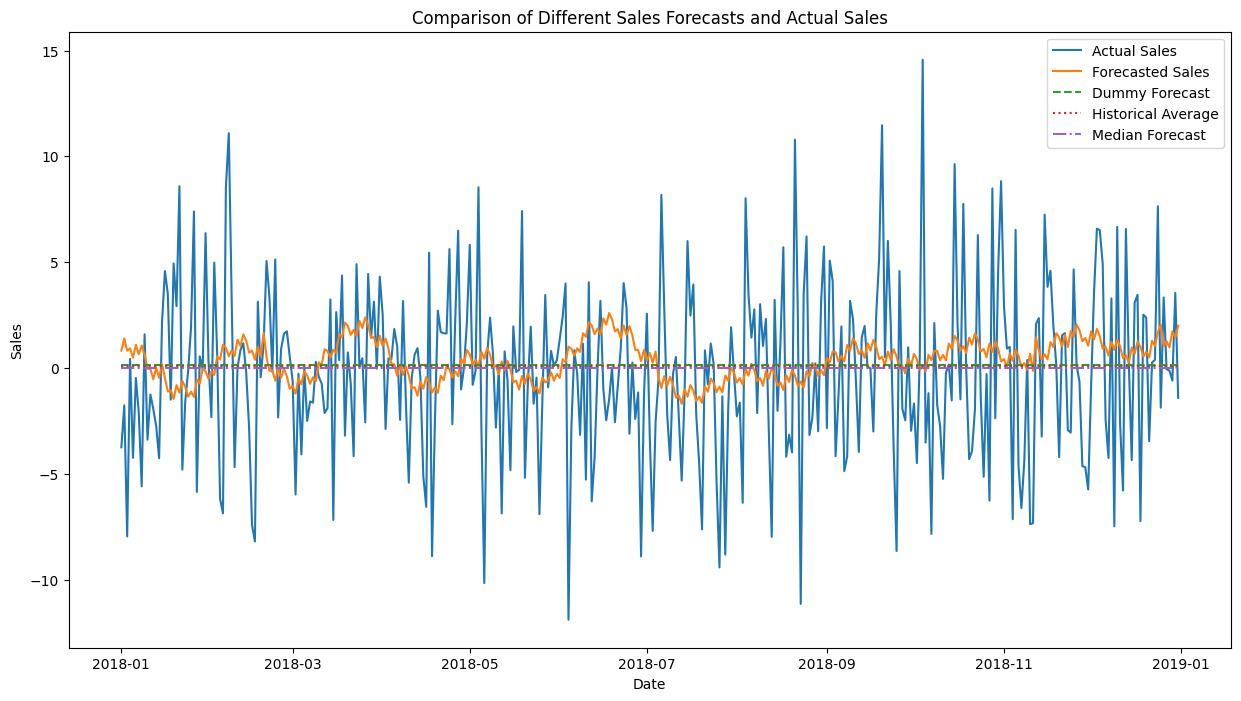

In [170]:

# Plot the forecast vs actual sales vs dummy forecast vs historical average
plt.figure(figsize=(15, 8))
plt.plot(merged_data['ds'], merged_data['y'], label='Actual Sales')
plt.plot(merged_data['ds'], merged_data['yhat'], label='Forecasted Sales')
plt.plot(merged_data['ds'], merged_data['Dummy Forecast'], label='Dummy Forecast', linestyle='--')
plt.plot(merged_data['ds'], merged_data['Historical Average'], label='Historical Average', linestyle=':')
plt.plot(merged_data['ds'], merged_data['Median Forecast'], label='Median Forecast', linestyle='-.')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Comparison of Different Sales Forecasts and Actual Sales')
plt.legend()
plt.show()

In [171]:

# Calculate error metrics
def mean_absolute_error(actual, predicted):
    return np.mean(np.abs(actual - predicted))

def root_mean_squared_error(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

def mean_absolute_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [172]:

mae_forecast = mean_absolute_error(merged_data['y'], merged_data['yhat'])
rmse_forecast = root_mean_squared_error(merged_data['y'], merged_data['yhat'])
mape_forecast = mean_absolute_percentage_error(merged_data['y'], merged_data['yhat'])

mae_dummy = mean_absolute_error(merged_data['y'], merged_data['Dummy Forecast'])
rmse_dummy = root_mean_squared_error(merged_data['y'], merged_data['Dummy Forecast'])
mape_dummy = mean_absolute_percentage_error(merged_data['y'], merged_data['Dummy Forecast'])

mae_historical = mean_absolute_error(merged_data['y'], merged_data['Historical Average'])
rmse_historical = root_mean_squared_error(merged_data['y'], merged_data['Historical Average'])
mape_historical = mean_absolute_percentage_error(merged_data['y'], merged_data['Historical Average'])



In [173]:
print('Prophet forecast:')
print(f'MAE: {mae_forecast}, RMSE: {rmse_forecast}, MAPE: {mape_forecast}')
print('Dummy forecast:')
print(f'MAE: {mae_dummy}, RMSE: {rmse_dummy}, MAPE: {mape_dummy}')
print('Historical average forecast:')
print(f'MAE: {mae_historical}, RMSE: {rmse_historical}, MAPE: {mape_historical}')

Prophet forecast:
MAE: 3.3358033025267826, RMSE: 4.240169312959844, MAPE: 262.9154020675611
Dummy forecast:
MAE: 3.2153952468389857, RMSE: 4.148759587873033, MAPE: 124.59665329448232
Historical average forecast:
MAE: 3.2097573249408664, RMSE: 4.143429620689789, MAPE: 112.55521759394469
